In [2]:
%load_ext autoreload
%autoreload 2

import os, sys
sys.path.insert(0, os.path.abspath(".."))
    
import numpy as np


from src.exp.exp_stime.data_hypparams import FLUX_RESULT_LINKS, FLUX_NODES, FLUX_MAINYEAR, FLUX_LOC_INFO_OURS_PATH, \
    FLUX_LOC_INFO_KRICH_PATH

from tigramite.toymodels import structural_causal_processes as toys
import tigramite.plotting as tp
from matplotlib import pyplot as plt

from src.exp.exp_stime.data_preproc import get_flux_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dinfo = get_flux_data()

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/demo/C://Users\\msara\\eda_papers\\git_thesissrc\\src//dsets/dsets_stime/fluxnet_locations_krichetal.csv'

In [ ]:
links = FLUX_RESULT_LINKS
n_n = len(FLUX_NODES)
nodes = FLUX_NODES
for node in range(n_n):
    for (pa, lg), _, _ in links[node]: print(f"{ n_n * np.abs(lg) + pa}, {node}: { nodes[node]}-> { nodes[pa]}")

main_yr = FLUX_MAINYEAR
loc_id_file = FLUX_LOC_INFO_OURS_PATH
info_file =  FLUX_LOC_INFO_KRICH_PATH

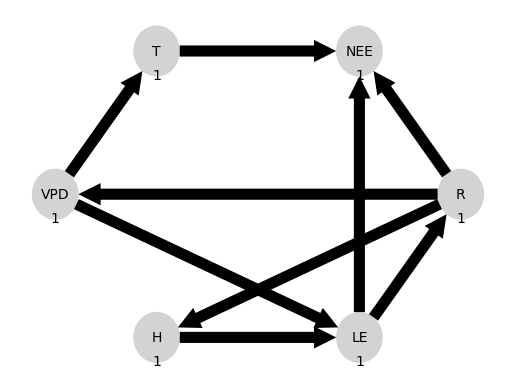

In [4]:
gt_graph = toys.links_to_graph({n: [((i, -l), v, f) for  ((i,l),v,f) in links[n]] for n in links}, tau_max=2)
var_names = FLUX_NODES
tp.plot_graph(
    graph=gt_graph,
    var_names=var_names,
    show_autodependency_lags=True
    ); plt.show()